# Cartes de stabilité adimensionnelles 
## Basé sur l'article de Batista, Steady motion of a rigid disk of finite thickness on a horizontal plane

### A chaque couple (a,h) est associée une carte de stabilité différente

<img src="https://i.ibb.co/kDXxTW2/Capture-d-e-cran-2019-08-02-a-09-48-49.png" alt="Capture-d-e-cran-2019-08-02-a-09-48-49" border="0"></a>

### Lorsque à partir d'une certaine valeur de h, de nouvelles zones d'instabilité apparaissent pour une vitesse et une inclinaison élevées

<img src="https://i.ibb.co/GvDgxvB/Capture-d-e-cran-2019-08-02-a-09-51-55.png" alt="Capture-d-e-cran-2019-08-02-a-09-51-55" border="0"></a>

# Cartes de contours
Le script qui suit trace les contours des cartes de stabilité correspondant à un certain ration a/h. Pour changer les ratios et le nombre de contours il suffit de modifier les listes al et hl.
Pour améliorer la résolution de la carte, augmenter le nombre de points des listes x et omega0

40.0
13.333333333333334
8.0
70.0
23.333333333333332
13.999999999999998
100.0
33.333333333333336
20.0


/Users/charlotte/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars
/Users/charlotte/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in double_scalars
/Users/charlotte/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in double_scalars


35.151515151515156
50
38.38383838383838
45
33.535353535353536
25


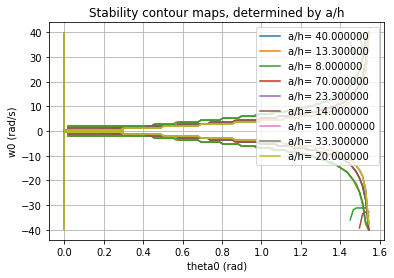

In [3]:
import math as ma
import matplotlib.pyplot as plt
import numpy as np

g=9.81

def carte(a,h):
    def delta(th, w0):
        k12 = 5 / 8 * h ** 2 + 0.5 * (a - h) ** 2
        k22 = (a - h) ** 2 + 3 / 4 * h ** 2
        coa = (k22 - k12 + (a - h) ** 2) * np.sin(th) * np.cos(th)
        cob = (k22 * w0 + (a - h) * a * w0) * np.cos(th)
        coc = (a - h) * np.sin(th) * g
        res = cob ** 2 - 4 * coa * coc
        return (res)

    def om02(th, w0):
        k12 = 5 / 8 * h ** 2 + 0.5 * (a - h) ** 2
        k22 = (a - h) ** 2 + 3 / 4 * h ** 2
        coa = (k22 - k12 + (a - h) ** 2) * np.sin(th) * np.cos(th)
        cob = (k22 * w0 + (a - h) * a * w0) * np.cos(th)
        coc = (a - h) * np.sin(th) * g
        d = cob ** 2 - 4 * coa * coc

        if d > 0:
            return ((-cob - np.sqrt(d)) / (2 * coa))
        elif d == 0 and coa!=0:
            return (-cob / (2 * coa))


    def w2(x, w0):

        w30 = ma.cos(x) * om02(x, w0)
        w20 = w0 + np.sin(x) * om02(x, w0)
        P22 = 36 * (3 * a + 2 * h * ma.copysign(1, x) * ma.tan(x))
        P23 = -6 * (4 * h * ma.copysign(1, x) * (3 * a ** 2 + 8 * h ** 2) * ma.tan(x) ** 2 + a * (
                    15 * a ** 2 + 56 * h ** 2) * ma.tan(x) + 2 * h * ma.copysign(1, x) * (15 * a ** 2 + 8 * h ** 2))
        P33 = 3 * (3 * a ** 2 + 16 * h ** 2) * (3 * a ** 2 + 8 * h ** 2) * ma.tan(x) ** 2 + 8 * a * h * (
                    15 * a ** 2 + 44 * h ** 2) * ma.tan(x) + 45 * a ** 4 + 216 * a ** 2 * h ** 2 + 128 * h ** 4

        return (((a ** 3 * P22 * w20 ** 2 + a * P23 * w20 * w30 + P33 * w30 ** 2) * ma.sqrt(
            1 + ma.tan(x) ** 2) - 12 * g * (3 * a ** 2 + 8 * h ** 2) * (a + h * ma.copysign(1, x) * ma.tan(x))) / (
                            (3 * a ** 2 + 8 * h ** 2) * (15 * a ** 2 + 56 * h ** 2) * ma.sqrt(1 + ma.tan(x) ** 2)))

    x = np.linspace(0.0, ma.pi / 2 - 0.01, 100)
    omega0 = np.linspace(-40.0, 40.0, 100)

    xst = []
    xinst = []
    xind = []

    w0st = []
    w0inst = []
    w0ind = []



    for i in range(len(x)):
        for j in range(len(omega0)):

            if delta(x[i], omega0[j]) >= 0 and w2(x[i], omega0[j]) > 0:
                xst.append(x[i])
                w0st.append(omega0[j])

            elif delta(x[i], omega0[j]) >= 0 and w2(x[i], omega0[j]) < 0:
                xind.append(x[i])
                w0ind.append(omega0[j])

            else:
                xinst.append(x[i])
                w0inst.append(omega0[j])

    fx = []
    fw0 = []
    fw0n = []
    val = 0.0

    #print(w0inst)

    for l in range(len(xinst)):
        if xinst[l]>0.05:
            #print(xinst[l])
            #print(l)
            k=l
            break

    while k < len(xinst):
        i = k + 1
        while i < len(xinst) and xinst[i] == xinst[k]:
            if w0inst[i] > val:
                val = w0inst[i]
            i = i + 1
        fx.append(xinst[k - 1])
        fw0.append(val)
        fw0n.append(-val)
        k = i

    fxind=[]
    fw0ind=[]
    fw0nind=[]

    q=0
    w=0
    valind=0.0

    #print(w0ind)
    #print(xind)

    #print(len(w0ind))
    #print(len(xind))

    while q < len(xind) and xind[w]<0.5:
        w = q + 1
        while w < len(xind) and xind[w] == xind[q]:
            if w0ind[w] < valind:
                valind = w0ind[w]
            w = w + 1
        fxind.append(xind[q])
        fw0ind.append(valind)
        fw0nind.append(-valind)
        q = w

    for l in range(len(xind)):
        if w0ind[l]>10:
            print(w0ind[l])
            print(l)
            q=l
            break

    fxind2 = []
    fw0ind2 = []
    fw0nind2 = []
    valind2=40.0

    while q < len(xind) and w0ind[q]>10:
        w = q + 1
        while w < len(xind) and xind[w] == xind[q]:
            if w0ind[w] < valind2:
                valind2 = w0ind[w]
            w = w + 1
        fxind2.append(xind[q])
        fw0ind2.append(valind2)
        fw0nind2.append(-valind2)
        q = w

    #print(fxind)

    return(fx,fw0,fw0n,fxind,fw0ind,fw0nind,fxind2,fw0ind2,fw0nind2)

al=np.linspace(0.4,1.0,3)
hl=np.linspace(0.01,0.05,3)

for i in range(len(al)):
    for j in range(len(hl)):
        print(al[i] / hl[j])

for i in range(len(al)):
    for j in range(len(hl)):
        r=3*i +j
        s=al[i]/hl[j]
        qu=np.around(s,1)
        sol=carte(al[i],hl[j])
        plt.plot(sol[0], sol[1], 'C%i' % r, label='a/h= %f' % qu)
        plt.plot(sol[0], sol[2], 'C%i' % r)
        plt.plot(sol[3], sol[4], 'C%i' % r)
        plt.plot(sol[3], sol[5], 'C%i' % r)
        plt.plot(sol[6], sol[7], 'C%i' % r)
        plt.plot(sol[6], sol[8], 'C%i' % r)
        plt.vlines(0.0, -40.0, 40.0, 'C%i' % r)


plt.legend(loc='best')
plt.xlabel('theta0 (rad)')
plt.ylabel('w0 (rad/s)')
plt.title('Stability contour maps, determined by a/h')

plt.grid()
plt.show()



# Cartes adimensionnelles
Le script qui suit trace les contours des cartes de stabilité adimensionnelles correspondant à un certain ratio a/h. Pour changer les ratios et le nombre de contours il suffit de modifier les listes al et hl.
Pour améliorer la résolution de la carte, augmenter le nombre de points des listes x et omega0

40.0
13.333333333333334
8.0
70.0
23.333333333333332
13.999999999999998
100.0
33.333333333333336
20.0


/Users/charlotte/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars
/Users/charlotte/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in double_scalars
/Users/charlotte/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in double_scalars


35.151515151515156
50
38.38383838383838
45
33.535353535353536
25


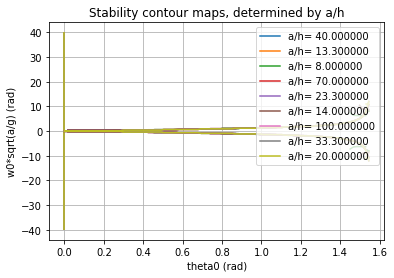

In [4]:
import math as ma
import matplotlib.pyplot as plt
import numpy as np

g=9.81

def carte(a,h):
    def delta(th, w0):
        k12 = 5 / 8 * h ** 2 + 0.5 * (a - h) ** 2
        k22 = (a - h) ** 2 + 3 / 4 * h ** 2
        coa = (k22 - k12 + (a - h) ** 2) * np.sin(th) * np.cos(th)
        cob = (k22 * w0 + (a - h) * a * w0) * np.cos(th)
        coc = (a - h) * np.sin(th) * g
        res = cob ** 2 - 4 * coa * coc
        return (res)

    def om02(th, w0):
        k12 = 5 / 8 * h ** 2 + 0.5 * (a - h) ** 2
        k22 = (a - h) ** 2 + 3 / 4 * h ** 2
        coa = (k22 - k12 + (a - h) ** 2) * np.sin(th) * np.cos(th)
        cob = (k22 * w0 + (a - h) * a * w0) * np.cos(th)
        coc = (a - h) * np.sin(th) * g
        d = cob ** 2 - 4 * coa * coc

        if d > 0:
            return ((-cob - np.sqrt(d)) / (2 * coa))
        elif d == 0 and coa!=0:
            return (-cob / (2 * coa))


    def w2(x, w0):

        w30 = ma.cos(x) * om02(x, w0)
        w20 = w0 + np.sin(x) * om02(x, w0)
        P22 = 36 * (3 * a + 2 * h * ma.copysign(1, x) * ma.tan(x))
        P23 = -6 * (4 * h * ma.copysign(1, x) * (3 * a ** 2 + 8 * h ** 2) * ma.tan(x) ** 2 + a * (
                    15 * a ** 2 + 56 * h ** 2) * ma.tan(x) + 2 * h * ma.copysign(1, x) * (15 * a ** 2 + 8 * h ** 2))
        P33 = 3 * (3 * a ** 2 + 16 * h ** 2) * (3 * a ** 2 + 8 * h ** 2) * ma.tan(x) ** 2 + 8 * a * h * (
                    15 * a ** 2 + 44 * h ** 2) * ma.tan(x) + 45 * a ** 4 + 216 * a ** 2 * h ** 2 + 128 * h ** 4

        return (((a ** 3 * P22 * w20 ** 2 + a * P23 * w20 * w30 + P33 * w30 ** 2) * ma.sqrt(
            1 + ma.tan(x) ** 2) - 12 * g * (3 * a ** 2 + 8 * h ** 2) * (a + h * ma.copysign(1, x) * ma.tan(x))) / (
                            (3 * a ** 2 + 8 * h ** 2) * (15 * a ** 2 + 56 * h ** 2) * ma.sqrt(1 + ma.tan(x) ** 2)))

    x = np.linspace(0.0, ma.pi / 2 - 0.01, 100)
    omega0 = np.linspace(-40.0, 40.0, 100)

    xst = []
    xinst = []
    xind = []

    w0st = []
    w0inst = []
    w0ind = []



    for i in range(len(x)):
        for j in range(len(omega0)):

            if delta(x[i], omega0[j]) >= 0 and w2(x[i], omega0[j]) > 0:
                xst.append(x[i])
                w0st.append(omega0[j])

            elif delta(x[i], omega0[j]) >= 0 and w2(x[i], omega0[j]) < 0:
                xind.append(x[i])
                w0ind.append(omega0[j])

            else:
                xinst.append(x[i])
                w0inst.append(omega0[j])

    fx = []
    fw0 = []
    fw0n = []
    val = 0.0

    #print(w0inst)

    for l in range(len(xinst)):
        if xinst[l]>0.05:
            #print(xinst[l])
            #print(l)
            k=l
            break

    while k < len(xinst):
        i = k + 1
        while i < len(xinst) and xinst[i] == xinst[k]:
            if w0inst[i] > val:
                val = w0inst[i]
            i = i + 1
        fx.append(xinst[k - 1])
        fw0.append(val*np.sqrt(a/g))
        fw0n.append(-val*np.sqrt(a/g))
        k = i

    fxind=[]
    fw0ind=[]
    fw0nind=[]

    q=0
    w=0
    valind=0.0

    #print(w0ind)
    #print(xind)

    #print(len(w0ind))
    #print(len(xind))

    while q < len(xind) and xind[w]<0.5:
        w = q + 1
        while w < len(xind) and xind[w] == xind[q]:
            if w0ind[w] < valind:
                valind = w0ind[w]
            w = w + 1
        fxind.append(xind[q])
        fw0ind.append(valind*np.sqrt(a/g))
        fw0nind.append(-valind*np.sqrt(a/g))
        q = w

    for l in range(len(xind)):
        if w0ind[l]>10:
            print(w0ind[l])
            print(l)
            q=l
            break

    fxind2 = []
    fw0ind2 = []
    fw0nind2 = []
    valind2=40.0

    while q < len(xind) and w0ind[q]>10:
        w = q + 1
        while w < len(xind) and xind[w] == xind[q]:
            if w0ind[w] < valind2:
                valind2 = w0ind[w]
            w = w + 1
        fxind2.append(xind[q])
        fw0ind2.append(valind2*np.sqrt(a/g))
        fw0nind2.append(-valind2*np.sqrt(a/g))
        q = w

    #print(fxind)

    return(fx,fw0,fw0n,fxind,fw0ind,fw0nind,fxind2,fw0ind2,fw0nind2)

al=np.linspace(0.4,1.0,3)
hl=np.linspace(0.01,0.05,3)

for i in range(len(al)):
    for j in range(len(hl)):
        print(al[i] / hl[j])

for i in range(len(al)):
    for j in range(len(hl)):
        r=3*i +j
        s=al[i]/hl[j]
        qu=np.around(s,1)
        sol=carte(al[i],hl[j])
        plt.plot(sol[0], sol[1], 'C%i' % r, label='a/h= %f' % qu)
        plt.plot(sol[0], sol[2], 'C%i' % r)
        plt.plot(sol[3], sol[4], 'C%i' % r)
        plt.plot(sol[3], sol[5], 'C%i' % r)
        plt.plot(sol[6], sol[7], 'C%i' % r)
        plt.plot(sol[6], sol[8], 'C%i' % r)
        plt.vlines(0.0, -40.0, 40.0, 'C%i' % r)


plt.legend(loc='best')
plt.xlabel('theta0 (rad)')
plt.ylabel('w0*sqrt(a/g) (rad)')
plt.title('Stability contour maps, determined by a/h')

plt.grid()
plt.show()

